# Introduction


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [77]:
import pandas as pd
import numpy as np
import time
import pickle

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import  MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score



import re
import nltk
import string

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Dataset

In [135]:
pd.options.mode.chained_assignment = None

df = pd.read_csv('/content/drive/MyDrive/dataset.csv', encoding = 'utf8')

df["text"] = df["text"].astype(str)
df.head()

,text,category
0,"when modi promised ""minimum government maximum...",-1
1,well said yes that the only perspective with w...,0
2,why are afraid modi wave,-1
3,your answer bjpmodi vision national security l...,0
4,please listen live broadcast narendra modi,1


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38658 entries, 0 to 38657
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      38658 non-null  object
 1   category  38658 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 604.2+ KB


In [137]:
print(df.isnull().sum())

text        0
category    0
dtype: int64


In [7]:
# Drop Null/NaN values
df.dropna(inplace=True)

negative    3035
positive    2977
Name: category, dtype: int64


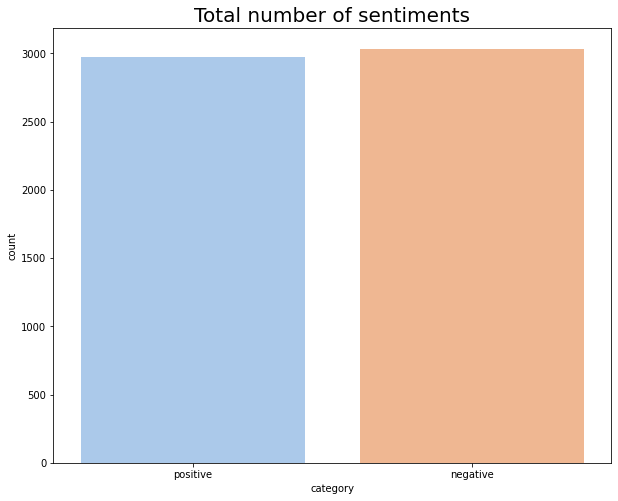

In [55]:
print(df.category.value_counts())
plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'category', data = df, palette = 'pastel')
ax.set_title(label = 'Total number of sentiments', fontsize = 20)
# ax.set_xticklabels(['Negative','Neutral','Positive'], rotation=0)
plt.show()

#Text Preprocessing

## Lower Casing


In [27]:
df["text_lower"] = df["text"].str.lower()
df[['text', 'text_lower']].head()

,text,text_lower
0,One of the other reviewers has mentioned that ...,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,a wonderful little production. <br /><br />the...
2,I thought this was a wonderful way to spend ti...,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...","petter mattei's ""love in the time of money"" is..."


##Remove HTML tags

In [30]:
CLEANR = re.compile('<.*?>') 

def cleanhtml(raw_html):
  cleantext = re.sub(CLEANR, '', raw_html)
  return cleantext

df["text_wo_html"] = df["text_lower"].apply(lambda text: cleanhtml(text))
df[['text_lower', 'text_wo_html']].head()  

,text_lower,text_wo_html
0,one of the other reviewers has mentioned that ...,one of the other reviewers has mentioned that ...
1,a wonderful little production. <br /><br />the...,a wonderful little production. the filming tec...
2,i thought this was a wonderful way to spend ti...,i thought this was a wonderful way to spend ti...
3,basically there's a family where a little boy ...,basically there's a family where a little boy ...
4,"petter mattei's ""love in the time of money"" is...","petter mattei's ""love in the time of money"" is..."


## Removal of Punctuations


In [32]:
def remove_punctuation(text):
  """custom function to remove the punctuation"""
  return re.sub(r'[^\w\s]', ' ', text)
  
df["text_wo_punct"] = df["text_wo_html"].apply(lambda text: remove_punctuation(text))
df[['text_wo_html', 'text_wo_punct']].head()

,text_wo_html,text_wo_punct
0,one of the other reviewers has mentioned that ...,one of the other reviewers has mentioned that ...
1,a wonderful little production. the filming tec...,a wonderful little production the filming tec...
2,i thought this was a wonderful way to spend ti...,i thought this was a wonderful way to spend ti...
3,basically there's a family where a little boy ...,basically there s a family where a little boy ...
4,"petter mattei's ""love in the time of money"" is...",petter mattei s love in the time of money is...


## Removal of stopwords

In [33]:
from nltk.corpus import stopwords
nltk.download('stopwords')
", ".join(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [35]:
STOPWORDS = set(stopwords.words('english'))
STOPWORDS.add(r"'s")
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["text_wo_stop"] = df["text_wo_punct"].apply(lambda text: remove_stopwords(text))
# df["text_wo_stop"] = df["text_wo_punct"]
df[['text_wo_punct', 'text_wo_stop']].head()

,text_wo_punct,text_wo_stop
0,one of the other reviewers has mentioned that ...,one reviewers mentioned watching 1 oz episode ...
1,a wonderful little production the filming tec...,wonderful little production filming technique ...
2,i thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...
3,basically there s a family where a little boy ...,basically family little boy jake thinks zombie...
4,petter mattei s love in the time of money is...,petter mattei love time money visually stunnin...


## Removal of Frequent words



In [38]:
from collections import Counter
cnt = Counter()
for text in df["text_wo_stop"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('movie', 10837),
 ('film', 9589),
 ('one', 6482),
 ('like', 4903),
 ('good', 3668),
 ('would', 3082),
 ('even', 3014),
 ('time', 3003),
 ('story', 2872),
 ('see', 2796)]

In [40]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

df["text_wo_stopfreq"] = df["text_wo_stop"].apply(lambda text: remove_freqwords(text))
df[['text_wo_stop', 'text_wo_stopfreq']].head()

,text_wo_stop,text_wo_stopfreq
0,one reviewers mentioned watching 1 oz episode ...,reviewers mentioned watching 1 oz episode hook...
1,wonderful little production filming technique ...,wonderful little production filming technique ...
2,thought wonderful way spend time hot summer we...,thought wonderful way spend hot summer weekend...
3,basically family little boy jake thinks zombie...,basically family little boy jake thinks zombie...
4,petter mattei love time money visually stunnin...,petter mattei love money visually stunning wat...


## Removal of Rare words



In [41]:

n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

df["text_wo_stopfreqrare"] = df["text_wo_stopfreq"].apply(lambda text: remove_rarewords(text))
df[['text_wo_stopfreq', 'text_wo_stopfreqrare']].head()

,text_wo_stopfreq,text_wo_stopfreqrare
0,reviewers mentioned watching 1 oz episode hook...,reviewers mentioned watching 1 oz episode hook...
1,wonderful little production filming technique ...,wonderful little production filming technique ...
2,thought wonderful way spend hot summer weekend...,thought wonderful way spend hot summer weekend...
3,basically family little boy jake thinks zombie...,basically family little boy jake thinks zombie...
4,petter mattei love money visually stunning wat...,petter mattei love money visually stunning wat...


## Lemmatization


In [42]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df["text_lemmatizer"] = df["text_wo_stopfreqrare"].apply(lambda text: lemmatize_words(text))
df[['text_wo_stopfreqrare', 'text_lemmatizer']].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,text_wo_stopfreqrare,text_lemmatizer
0,reviewers mentioned watching 1 oz episode hook...,reviewer mention watch 1 oz episode hook right...
1,wonderful little production filming technique ...,wonderful little production film technique una...
2,thought wonderful way spend hot summer weekend...,think wonderful way spend hot summer weekend s...
3,basically family little boy jake thinks zombie...,basically family little boy jake think zombie ...
4,petter mattei love money visually stunning wat...,petter mattei love money visually stunning wat...


In [94]:
def preprocess(text):
  text = text.lower()
  text = cleanhtml(text)
  text = remove_punctuation(text)
  text = remove_stopwords(text)
  text = remove_freqwords(text)
  text = remove_rarewords(text)
  text = lemmatize_words(text)
  return text

In [43]:
df['text'] = df['text_lemmatizer']

#Analysing the data

###Word-Cloud for Positive tweets

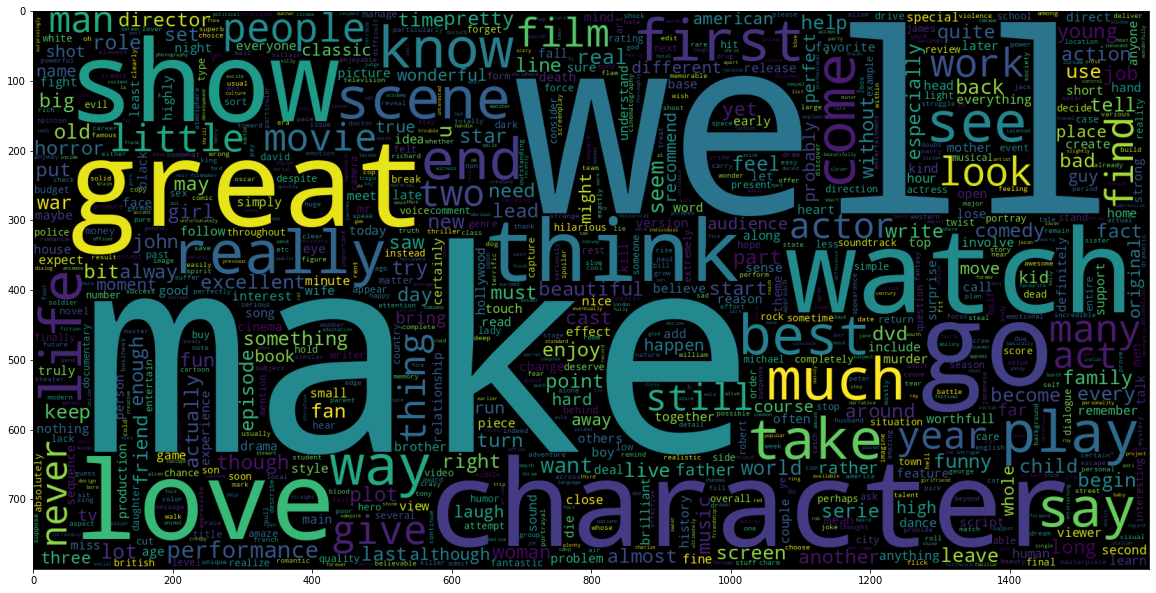

In [44]:
data_pos = df[df.category == 'positive']['text'].astype(str)
# data_pos = df
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_pos))
plt.imshow(wc)

###Word-Cloud for Negative tweets

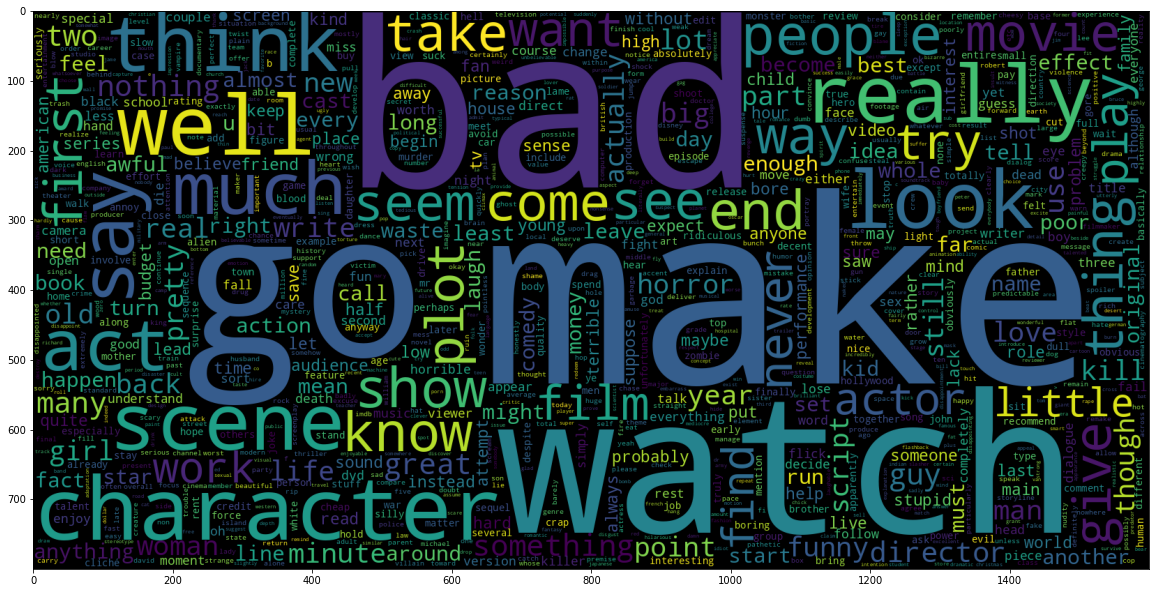

In [46]:
data_neg = df[df.category == 'negative']['text'].astype(str)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

# Tranforming the dataset

In [118]:
vectorizer = CountVectorizer()

In [119]:
all_features = vectorizer.fit_transform(df.text)
all_features.shape

(6012, 36154)

#Split Data

In [49]:
X_train, X_test, y_train, y_test = train_test_split(all_features, 
                                                    df.category, 
                                                    test_size=0.3, 
                                                    random_state=42, 
                                                    stratify= df.category)

#Model

##NB

In [117]:
classifier_nb = MultinomialNB()
t = time.time()
classifier_nb.fit(X_train, y_train)
time_for_train_nb = time.time()-t
print(f'Time Taken: {time_for_train_nb} seconds')

Time Taken: 0.023523330688476562 seconds


##KNN


In [51]:
classifier_knn = KNeighborsClassifier(n_neighbors=7)

t = time.time()
classifier_knn.fit(X_train,y_train)
time_for_train_knn = time.time()-t
print(f'Time Taken: {time_for_train_knn} seconds')

Time Taken: 0.005681276321411133 seconds


##SVM

In [74]:
# svm rbf
classifier_svm = SVC(C = 1,kernel = 'rbf')

t = time.time()
classifier_svm.fit(X_train, y_train)
time_for_train_svm = time.time()-t
print(f'Time Taken: {time_for_train_svm} seconds')

Time Taken: 16.976085901260376 seconds


##Decision Tree

In [54]:
classifier_dtree = DecisionTreeClassifier(criterion = 'entropy')

t = time.time()
classifier_dtree.fit(X_train, y_train)
time_for_train_dtree = time.time()-t
print(f'Time Taken: {time_for_train_dtree} seconds')

Time Taken: 1.9354228973388672 seconds


#Evalution

In [64]:
# source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html


titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
# class_names = ['Negative', 'Neutral', 'Positive']
class_names = ['Negative', 'Positive']

def model_Evaluate(model):

  y_pred = model.predict(X_test)
  print(classification_report(y_test, y_pred))

  for title, normalize in titles_options:
      disp = ConfusionMatrixDisplay.from_predictions(
          y_test,
          y_pred,
          # display_labels=class_names,
          cmap=plt.cm.Blues,
          normalize=normalize,
      )
      disp.ax_.set_title(title)
      plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
      plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)

              precision    recall  f1-score   support

    negative       0.63      0.76      0.69       911
    positive       0.69      0.55      0.61       893

    accuracy                           0.66      1804
   macro avg       0.66      0.66      0.65      1804
weighted avg       0.66      0.66      0.65      1804



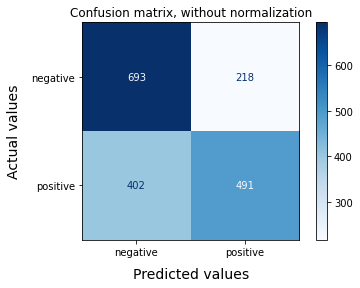

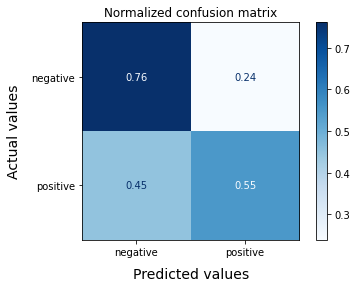

In [65]:
model_Evaluate(classifier_knn)

              precision    recall  f1-score   support

    negative       0.82      0.86      0.84       911
    positive       0.85      0.81      0.83       893

    accuracy                           0.84      1804
   macro avg       0.84      0.84      0.84      1804
weighted avg       0.84      0.84      0.84      1804



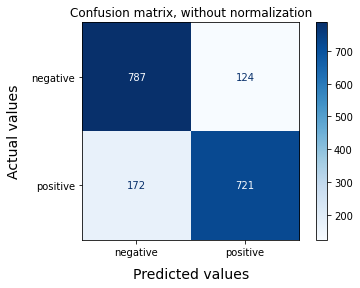

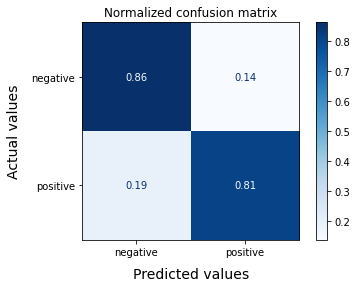

In [66]:
model_Evaluate(classifier_nb)

              precision    recall  f1-score   support

    negative       0.87      0.80      0.84       911
    positive       0.81      0.88      0.85       893

    accuracy                           0.84      1804
   macro avg       0.84      0.84      0.84      1804
weighted avg       0.84      0.84      0.84      1804



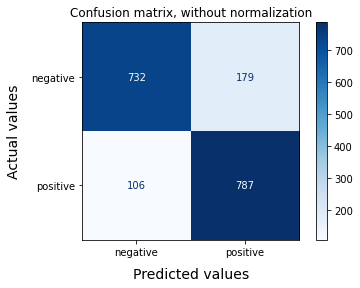

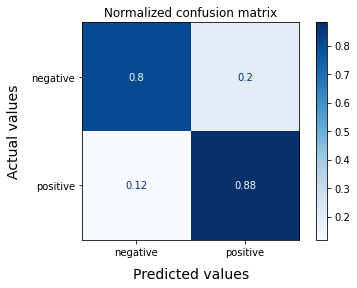

In [75]:
model_Evaluate(classifier_svm)

              precision    recall  f1-score   support

    negative       0.72      0.72      0.72       911
    positive       0.71      0.71      0.71       893

    accuracy                           0.71      1804
   macro avg       0.71      0.71      0.71      1804
weighted avg       0.71      0.71      0.71      1804



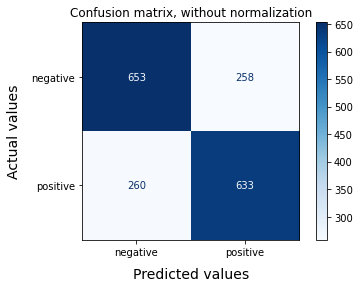

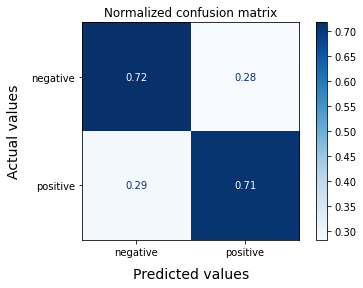

In [70]:
model_Evaluate(classifier_dtree)

#Save model


In [122]:


# save the model to disk
filename = '/content/drive/MyDrive/classifier_dtree.sav'
pickle.dump(classifier_dtree, open(filename, 'wb'))
filename = '/content/drive/MyDrive/classifier_nb.sav'
pickle.dump(classifier_nb, open(filename, 'wb'))
filename = '/content/drive/MyDrive/classifier_knn.sav'
pickle.dump(classifier_knn, open(filename, 'wb'))
filename = '/content/drive/MyDrive/classifier_svm.sav'
pickle.dump(classifier_svm, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))


In [121]:
strr = "A wonderful little production The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done."
t = preprocess(strr)

b = [t]
a = vectorizer.transform(b)
result = classifier_svm.predict(a)
print(result)

['positive']


#Compare

In [ ]:
t = time.time()
y_pred = classifier_nb.predict(X_test)
time_for_predict_nb = time.time() - t
acc_nb = accuracy_score(y_test, y_pred)

t = time.time()
y_pred = classifier_knn.predict(X_test)
time_for_predict_knn = time.time() - t
acc_knn = accuracy_score(y_test, y_pred)

t = time.time()
y_pred = classifier_svm_rbf.predict(X_test)
time_for_predict_svm_rbf = time.time() - t
acc_svm_rbf = accuracy_score(y_test, y_pred)

t = time.time()
y_pred = classifier_svm_linear.predict(X_test)
time_for_predict_svm_linear = time.time() - t
acc_svm_linear = accuracy_score(y_test, y_pred)

t = time.time()
y_pred = classifier_dtree.predict(X_test)
time_for_predict_dtree = time.time() - t
acc_dtree = accuracy_score(y_test, y_pred)


In [ ]:
print(f'KNN:           Train: {time_for_train_knn:.3f}s, Predict: {time_for_predict_knn:.3f}s, Accuracy: {acc_knn*100:.2f}%')
print(f'Naive Bayes:   Train: {time_for_train_nb:.3f}s, Predict: {time_for_predict_nb:.3f}s, Accuracy: {acc_nb*100:.2f}%')
print(f'SVM rbf:       Train: {time_for_train_svm_rbf:.3f}s, Predict: {time_for_predict_svm_rbf:.3f}s, Accuracy: {acc_svm_rbf*100:.2f}%')
print(f'SVM linear:    Train: {time_for_train_svm_linear:.3f}s, Predict: {time_for_predict_svm_linear:.3f}s, Accuracy: {acc_svm_linear*100:.2f}%')
print(f'Decision Tree: Train: {time_for_train_dtree:.3f}s, Predict: {time_for_predict_dtree:.3f}s, Accuracy: {acc_dtree*100:.2f}%')

KNN:           Train: 0.009s, Predict: 8.984s, Accuracy: 45.41%
Naive Bayes:   Train: 0.021s, Predict: 0.005s, Accuracy: 65.21%
SVM rbf:       Train: 395.548s, Predict: 41.813s, Accuracy: 80.10%
SVM linear:    Train: 272.659s, Predict: 18.866s, Accuracy: 84.13%
Decision Tree: Train: 12.064s, Predict: 0.013s, Accuracy: 78.98%


#Tuning parameters using GridsearchCV 

In [123]:
from sklearn.model_selection import GridSearchCV

In [124]:
# param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
param_grid = {
    'n_neighbors': [5,7],
    'weights': ['uniform', 'distance'],
    # 'p': [1,2]
}

In [125]:
grid = GridSearchCV(classifier_knn,param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ....n_neighbors=5, weights=uniform;, score=0.638 total time=   0.2s
[CV 2/5] END ....n_neighbors=5, weights=uniform;, score=0.631 total time=   0.2s
[CV 3/5] END ....n_neighbors=5, weights=uniform;, score=0.652 total time=   0.2s
[CV 4/5] END ....n_neighbors=5, weights=uniform;, score=0.598 total time=   0.2s
[CV 5/5] END ....n_neighbors=5, weights=uniform;, score=0.637 total time=   0.2s
[CV 1/5] END ...n_neighbors=5, weights=distance;, score=0.638 total time=   0.2s
[CV 2/5] END ...n_neighbors=5, weights=distance;, score=0.631 total time=   0.2s
[CV 3/5] END ...n_neighbors=5, weights=distance;, score=0.653 total time=   0.2s
[CV 4/5] END ...n_neighbors=5, weights=distance;, score=0.600 total time=   0.2s
[CV 5/5] END ...n_neighbors=5, weights=distance;, score=0.639 total time=   0.2s
[CV 1/5] END ....n_neighbors=7, weights=uniform;, score=0.647 total time=   0.3s
[CV 2/5] END ....n_neighbors=7, weights=uniform;,

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=7),
             param_grid={'n_neighbors': [5, 7],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [126]:
print(grid.best_estimator_)
print(grid.best_params_)

KNeighborsClassifier(n_neighbors=7, weights='distance')
{'n_neighbors': 7, 'weights': 'distance'}


In [127]:
from sklearn.metrics import classification_report, confusion_matrix
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[693 218]
 [400 493]]
              precision    recall  f1-score   support

    negative       0.63      0.76      0.69       911
    positive       0.69      0.55      0.61       893

    accuracy                           0.66      1804
   macro avg       0.66      0.66      0.65      1804
weighted avg       0.66      0.66      0.65      1804



              precision    recall  f1-score   support

    negative       0.63      0.76      0.69       911
    positive       0.69      0.55      0.61       893

    accuracy                           0.66      1804
   macro avg       0.66      0.66      0.65      1804
weighted avg       0.66      0.66      0.65      1804



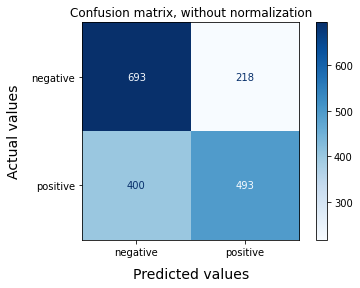

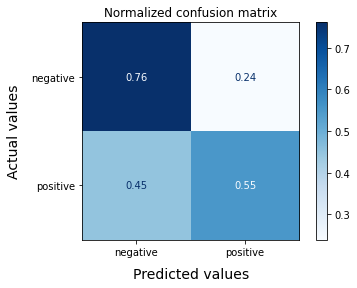

In [128]:
model_Evaluate(grid)